<a href="https://colab.research.google.com/github/liuxx479/kappaTNG/blob/master/Clkk_fitting_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from pylab import *
import os
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
root = '/content/drive/My Drive/kappaTNG/'
ratio_path= os.path.join(root,'Clkk_ratio/')

In [4]:
zs = np.genfromtxt(ratio_path+'zs.dat')
zs

array([0.034467, 0.069515, 0.105182, 0.14151 , 0.178545, 0.216332,
       0.254921, 0.294363, 0.334713, 0.376027, 0.418368, 0.461799,
       0.506387, 0.552205, 0.599329, 0.647838, 0.697818, 0.749361,
       0.802561, 0.857522, 0.914352, 0.973168, 1.034093, 1.09726 ,
       1.162811, 1.230896, 1.301678, 1.37533 , 1.45204 , 1.532007,
       1.615449, 1.702597, 1.793703, 1.889038, 1.988896, 2.093596,
       2.203481, 2.318928, 2.440344, 2.568175])

In [5]:
ratios = np.array([np.genfromtxt(ratio_path+'ratio%02d.dat'%(i)) for i in range(1,41)])
ratios.shape ## the three columns are ell, ratio, std_ratio

(40, 30, 3)

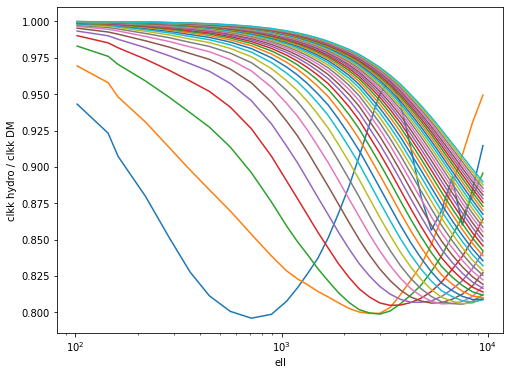

In [6]:
f, ax = subplots(1,1,figsize=(8,6))
for i in range(40):
    ax.plot(ratios[i,:,0],ratios[i,:,1])
ax.set_xlabel('ell')
ax.set_ylabel('clkk hydro / clkk DM')
ax.set_xscale('log')

In [7]:
############# fitting formula from Ken
zs2,  ls1,  ls2,  a1,  a2 = np.genfromtxt(root+'fitted_params_osato.txt', usecols=range(1,6)).T

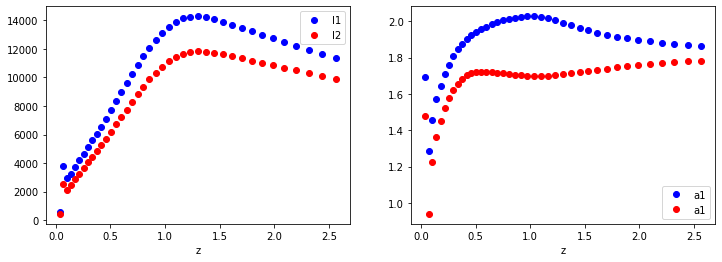

In [8]:
f, axes=subplots(1,2,figsize=(12,4))

axes[0].plot(zs, ls1,'bo',label='l1')
axes[0].plot(zs, ls2,'ro',label='l2')
axes[1].plot(zs, a1,'bo',label='a1')
axes[1].plot(zs, a2,'ro',label='a1')

axes[0].set_xlabel('z')
axes[1].set_xlabel('z')
axes[0].legend()
axes[1].legend()

In [9]:
## next, try to find a fitting formula with AI-Feynman https://github.com/SJ001/AI-Feynman
## https://github.com/dcshapiro/AI-Feynman/blob/master/AI_Feynman_2_0.ipynb
## or https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
## https://umap-learn.readthedocs.io/en/latest/
## or https://gplearn.readthedocs.io/en/stable/

In [10]:
!pip install --quiet git+https://github.com/SJ001/AI-Feynman.git

     |████████████████████████████████| 5.8MB 2.8MB/s 


In [11]:
from feynman import run_aifeynman
# run_aifeynman(root+"AI-Feynman/example_data/", "example1.txt", 30,
#               "14ops.txt", polyfit_deg=3, NN_epochs=500)

In [14]:
ratios.shape

(40, 30, 3)

In [32]:
new_ratios = np.zeros(shape=ratios.shape)
new_ratios[:,:,0]=zs.reshape(40,1)
new_ratios[:,:,1:]=ratios[:,:,:-1]
new_ratios=new_ratios[1:].reshape(-1,3)# remove the lowest redshift, flatten to 2D array

In [35]:
savetxt(root+'arr_z_ell_ratio.txt',new_ratios.reshape(-1,3))

In [36]:
run_aifeynman(root, "arr_z_ell_ratio.txt", 30,
              "14ops.txt", polyfit_deg=3, NN_epochs=500)

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/kappaTNG/arr_z_ell_ratio.txt_train
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/kappaTNG/arr_z_ell_ratio.txt_train
Checking polyfit 

Complexity  RMSE  Expression
[21.779565475879124, 26.516369930367844, '-0.125*x0**2 + 0.166666666666667*x0 + 1']
[46.41365973296049, 25.39728353936803, 0.937354326248169]
[46.41366781329889, 25.39712650363498, 0.937359576256767]
[46.41366885692611, 25.39709441991763, 0.937360254330990]
[46.41366909676063, 25.39708659418028, 0.937360410158350]
[46.85528939576039, 24.52906380544052, '0.318264040704*pi']
[55.49261696522365, 24.267020732795586, '0.990084549843*exp((x1)**(-1))']
[98.74025967698799, 24.263640767824356, '0.990131987762*((x1)**(-1)+1)']
[257.68843074133395, 24.09386271168568, '0.0270816907924649*x0**3 - 0.124169786023173*x0**2 + 2.15828324312973e-5*x0*x1 + 0.16893

In [41]:
!ls 

args.dat	     drive	  qaz.dat  sample_data
arr_z_ell_ratio.txt  mystery.dat  results


In [43]:
!cp -r results /content/drive/My\ Drive/kappaTNG/

In [44]:
#!more results/solution_arr_z_ell_ratio.txt

29.90335951382487 4.8869083013975505 5717.6827126351345 0.0 29.58734424969743 ta
n(-666.000000000000*sin(pi))
24.626236913081375 4.563767294318161 5339.607734352248 1.0 23.649983867167027 (1
.00000000000000)**2
24.529857311367344 4.555209023451502 5329.594557438257 48.7887557268636 23.51010
4124014045 (0.318286958190*pi)**2
23.441873480453328 4.5510159698074935 5324.6886846747675 250.4667711252688 23.44
1873480453342 0.9848146642633574*(-0.019578222661790087*x0**2 - 2.02288383291871
33e-9*x0*x1**2 + 1.641819797681833e-5*x0*x1 + 0.039406092117118*x0 + 3.575400456
586608e-9*x1**2 - 3.66670733680876e-5*x1 + 1)**2
23.262241741537764 4.53991822839496 5311.7043272221035 296.9100791519537 23.2622
41741537757 0.0270816907924649*x0**3 - 0.124169786023173*x0**2 - 2.0074659926614
5e-9*x0*x1**2 + 2.15828324312973e-5*x0*x1 + 0.168932524609634*x0 + 3.54814978000
383e-9*x1**2 - 5.71221442834641e-5*x1 + 0.95178864501324
23.002157259721933 4.523697265707273 5292.72580087751 318.59780031264756 23.0021
5

In [45]:
fitted_func = lambda x0, x1: cos(-0.0541633815849298*x0**3 - 1.47466027666912e-5*x0**2*x1 + 0.327612012428372*x0**2 + 4.0149319853229e-9*x0*x1**2 + 3.67312552851255e-6*x0*x1 - 0.589653564688882*x0 + 1.09311134922405e-12*x1**3 - 2.76052225357658e-8*x1**2 + 0.000199463428617564*x1 + 0.291165295686544)
## x0, x1 are z, ell

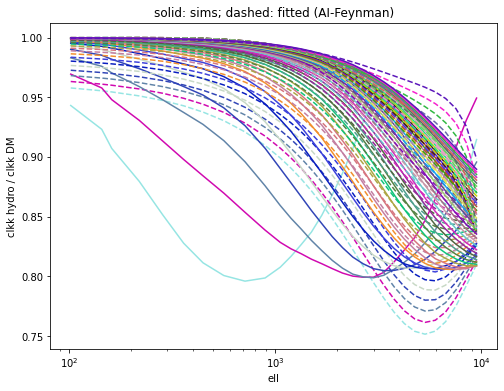

In [61]:
seed(20)
f, ax = subplots(1,1,figsize=(8,6))
for i in range(40):
  icolor=rand(3)
  iz=zs[i]
  ell, iratio = ratios[i,:,0], ratios[i,:,1]
  iratio_pred = fitted_func(iz, ell)
  ax.plot(ell, iratio, color=icolor)
  ax.plot(ell, iratio_pred, '--', color=icolor)
ax.set_xlabel('ell')
ax.set_ylabel('clkk hydro / clkk DM')
ax.set_xscale('log')
ax.set_title('solid: sims; dashed: fitted (AI-Feynman)')
show()